# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Dataset

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [3]:
pd.options.display.max_columns = 100

In [4]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  
0                  0.11890     0.0  
1                  0.08902     0.0  
2                  0.08758     0.0  
3                  0.17300     0.0  
4                  0.07678     0.0

# 3. Exploratory Data Analysis (EDA)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.shape

(569, 31)

### Data Description

In [7]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     569.000000              569.000000    569.000000     569.000000   
mean        0.181162                0.062798      0.405172       1.216853   
std         0.027414                0.007060      0.277313       0.551648   
min         0.106000                0.049960      0.111500       0.360200   
25%         0.161900                0.057700      0.232400       0.833900   
50%         0.179200                0.061540      0.324200       1.108000   
75%         0.195700                0.066120      0.478900       1.474000   
max         0.304000                0.097440      2.873000       4.885000   

       perimeter error  area error  smoothness error  compactness error  \
count       569.000000  569.000000        569.000000         569.000000   
mean          2.866059   40.337079          0.007041           0.025478   
std           2.021855   45.491006          0.003003           0.017908   
min           0.757000    6.802000          0.001713           0.002252   
25%           1.606000   17.850000          0.005169           0.013080   
50%           2.287000   24.530000          0.006380           0.020450   
75%           3.357000   45.190000          0.008146           0.032450   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       569.000000            569.000000      569.000000   
mean          0.031894              0.011796        0.020542   
std           0.030186              0.006170        0.008266   
min           0.000000              0.000000        0.007882   
25%           0.015090              0.007638        0.015160   
50%           0.025890              0.010930        0.018730   
75%           0.042050              0.014710        0.023480   
max           0.396000              0.052790        0.078950   

       fractal dimension error  worst radius  worst texture  worst perimeter  \
count               569.000000    569.000000     569.000000       569.000000   
mean                  0.003795     16.269190      25.677223       107.261213   
std                   0.002646      4.833242       6.146258        33.602542   
min                   0.000895      7.930000      12.020000        50.410000   
25%                   0.002248     13.010000      21.080000        84.110000   
50%                   0.003187     14.970000      25.410000        97.660000   
75%                   0.004558     18.790000      29.720000       125.400000   
max                   0.029840     36.040000      49.540000       251.200000   

        worst area  wor

### Check Missing Value

missing_value    %
mean radius                          0  0.0
mean texture                         0  0.0
mean perimeter                       0  0.0
mean area                            0  0.0
mean smoothness                      0  0.0
mean compactness                     0  0.0
mean concavity                       0  0.0
mean concave points                  0  0.0
mean symmetry                        0  0.0
mean fractal dimension               0  0.0
radius error                         0  0.0
texture error                        0  0.0
perimeter error                      0  0.0
area error                           0  0.0
smoothness error                     0  0.0
compactness error                    0  0.0
concavity error                      0  0.0
concave points error                 0  0.0
symmetry error                       0  0.0
fractal dimension error              0  0.0
worst radius                         0  0.0
worst texture                        0  0.0
worst perimeter                      0  0.0
worst area                           0  0.0
worst smoothness                     0  0.0
worst compactness                    0  0.0
worst concavity                      0  0.0
worst concave points                 0  0.0
worst symmetry                       0  0.0
worst fractal dimension              0  0.0
target                               0  0.0

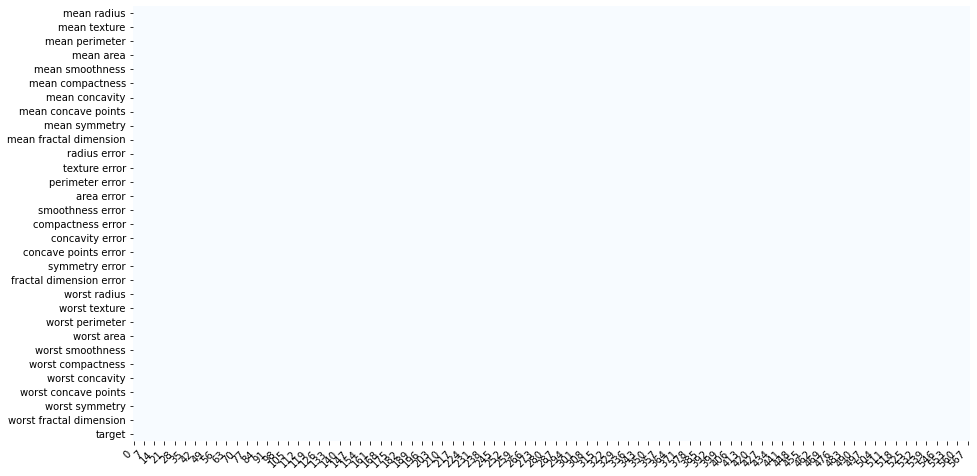

In [8]:
plot_missing_value(df, return_df= True)

In [9]:
df.head(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33            184.6      2019.0            0.1622   
1         24.99          23.41            158.8      1956.0            0.1238   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   worst fractal dimension  target  
0                  0.11890     0.0  
1                  0.08902     0.0

In [10]:
mean_size = list(df.iloc[:, :10])
error_size = list(df.iloc[:, 10:20])
worst_size = list(df.iloc[:, 20:])

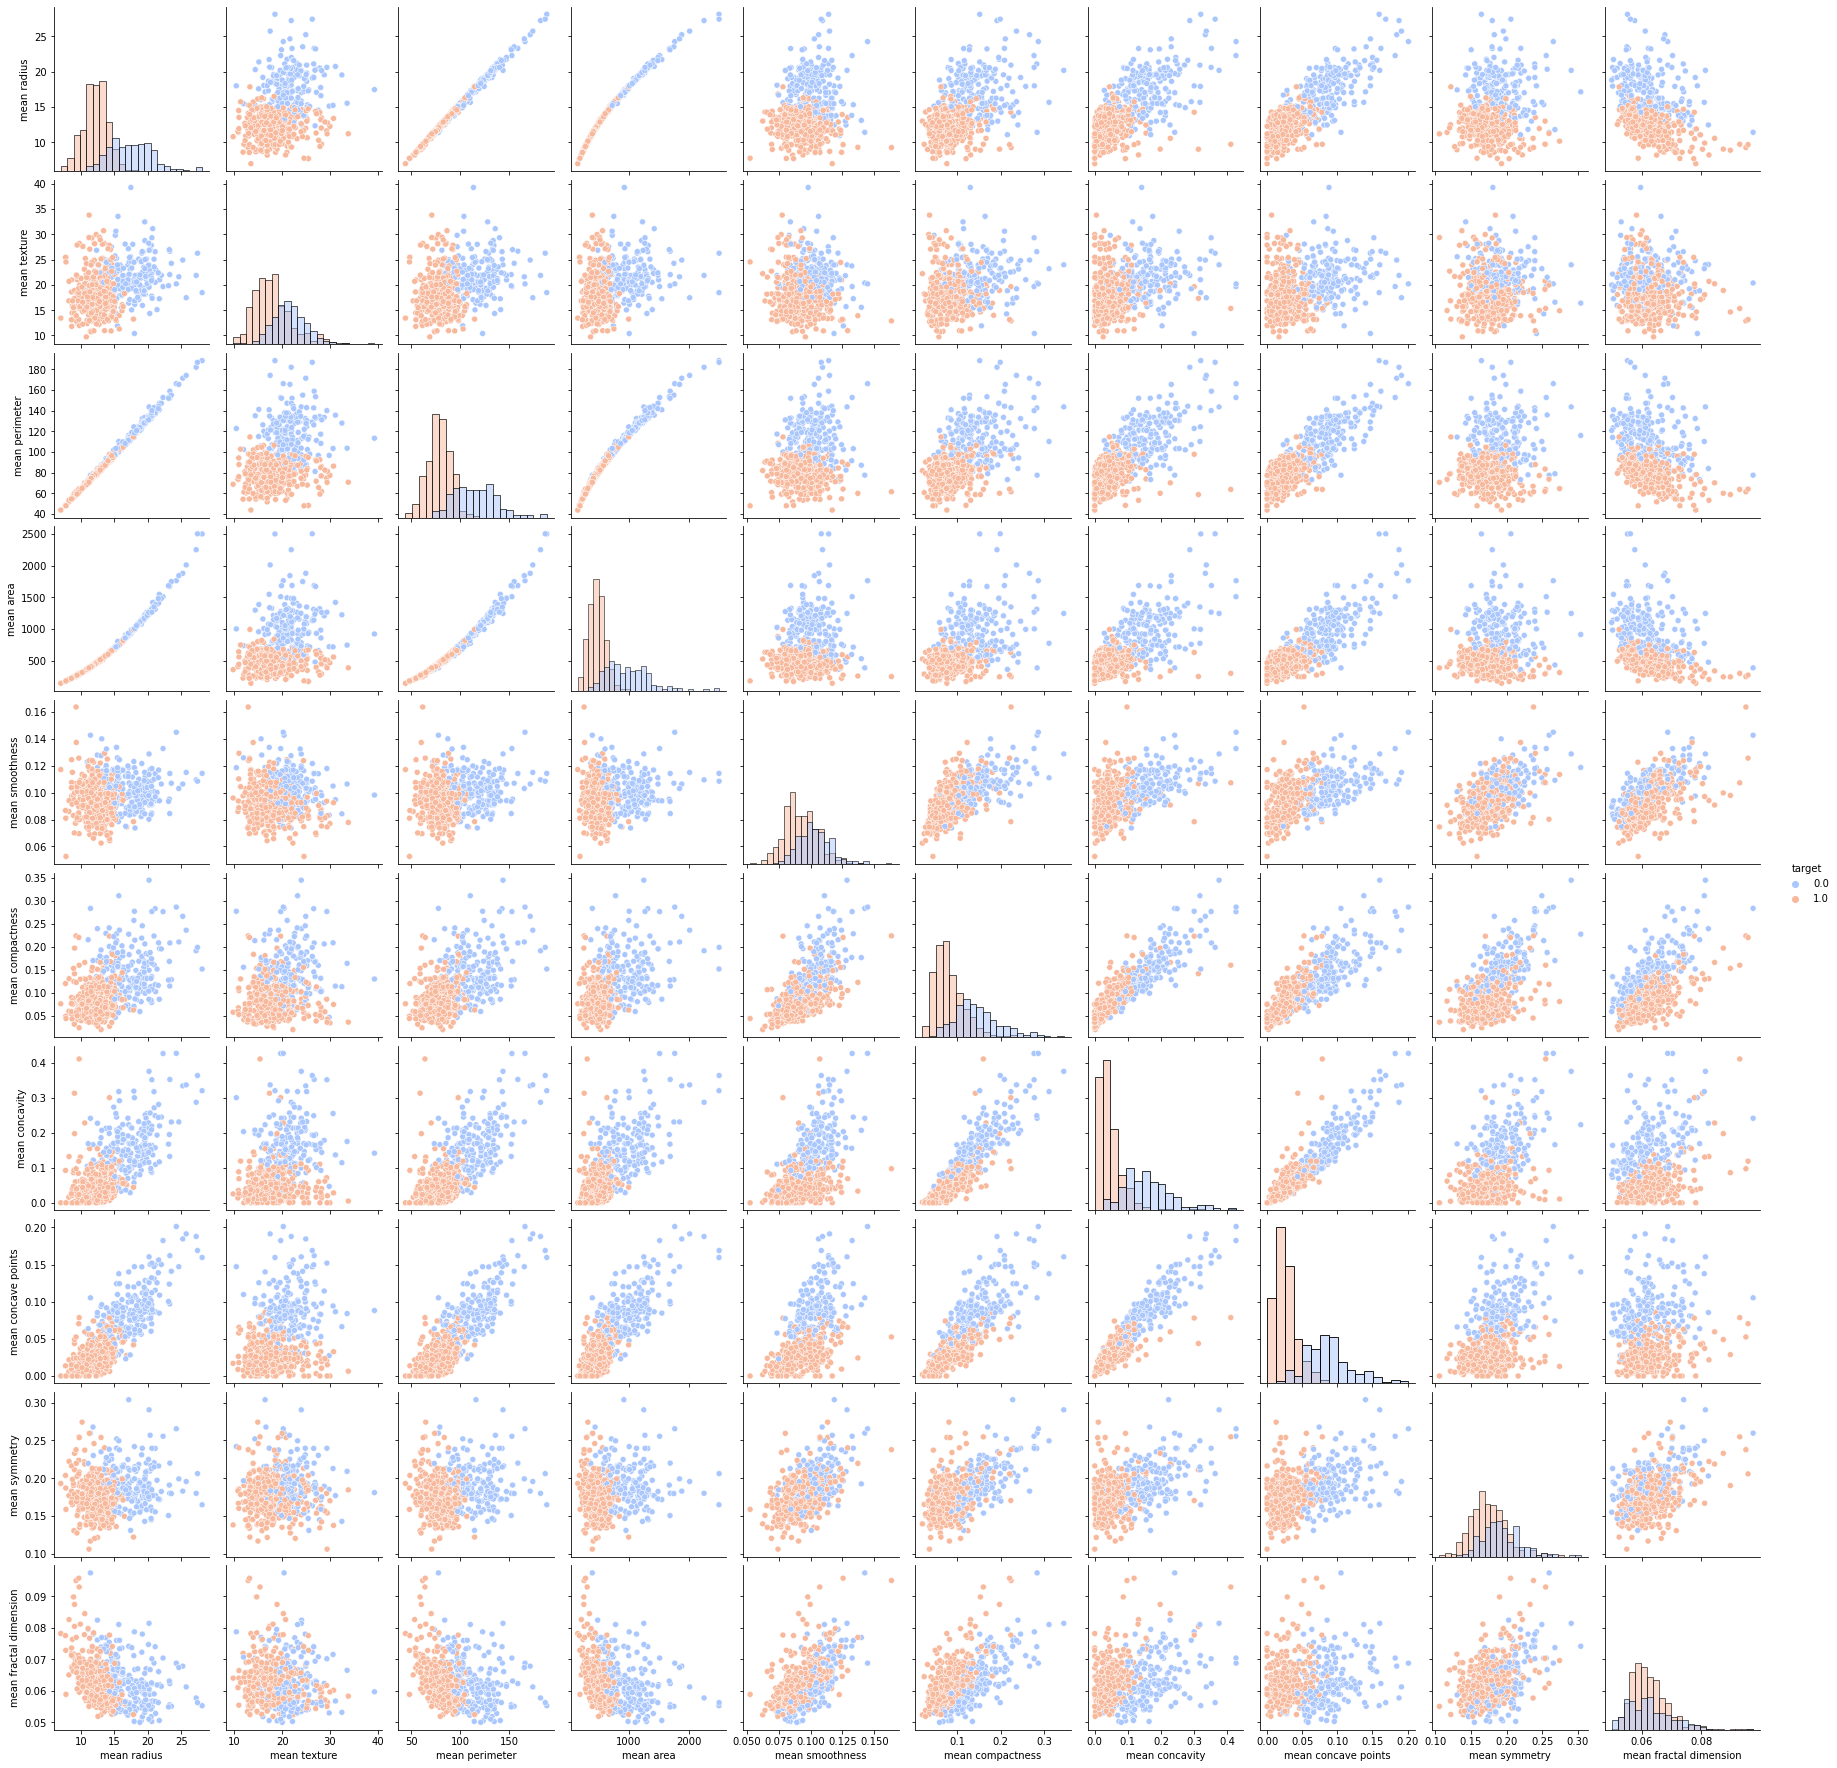

In [11]:
sns.pairplot(data = df, vars = mean_size, hue='target',palette='coolwarm', diag_kind='hist')

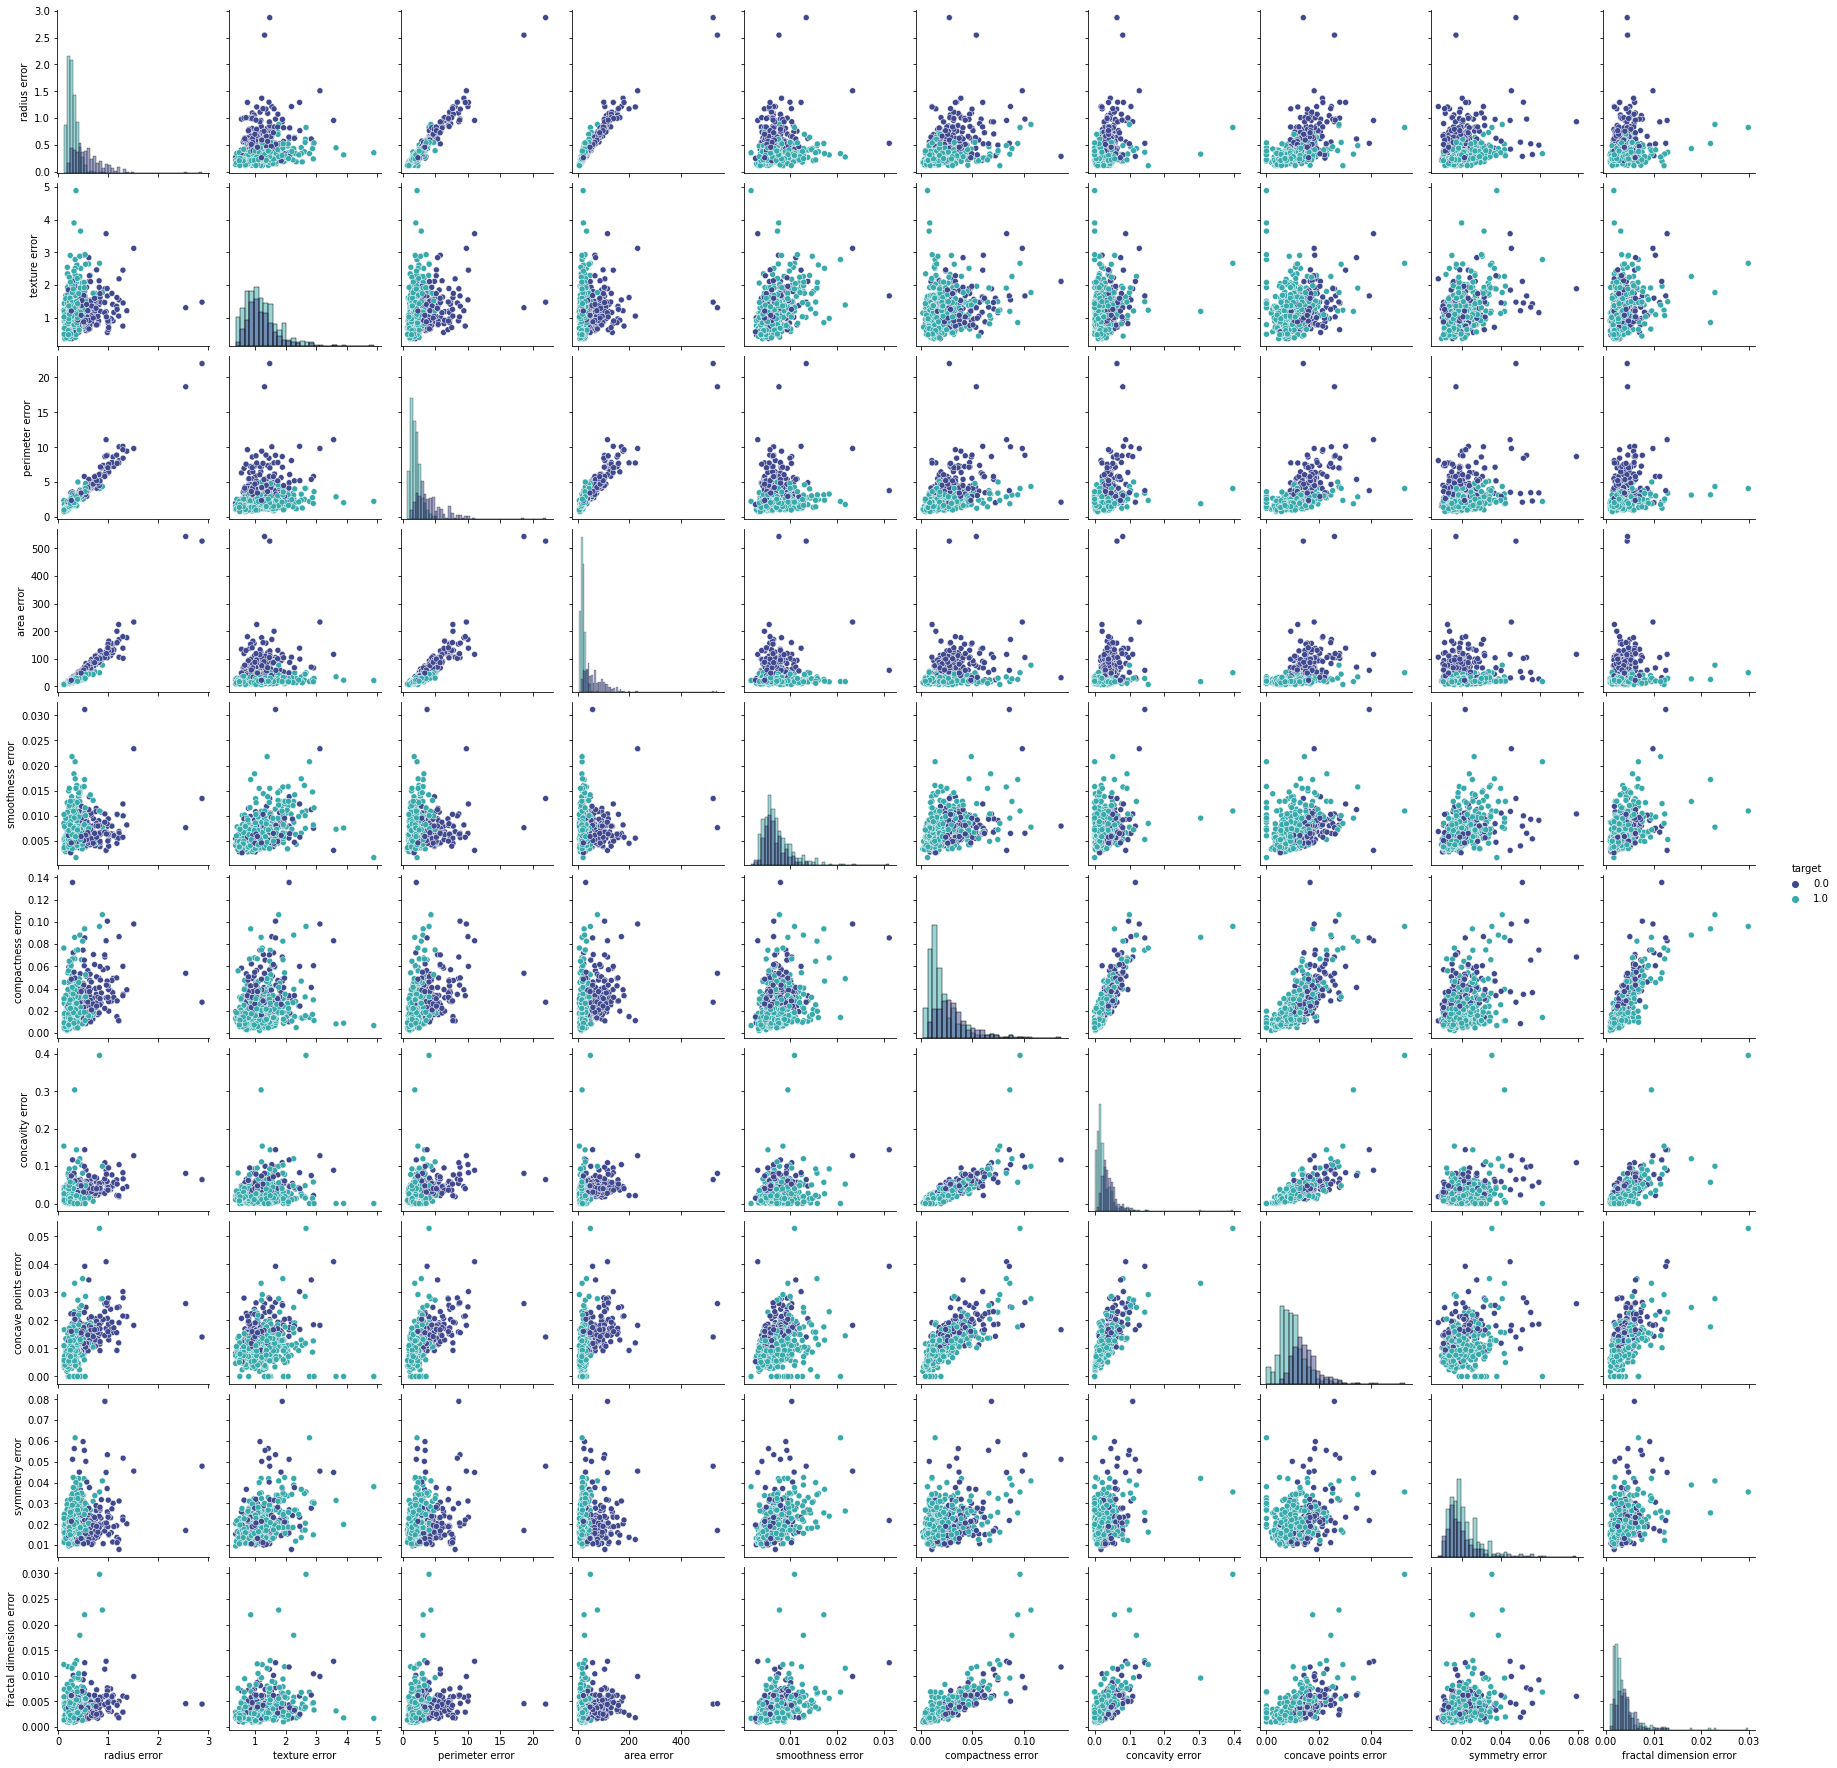

In [12]:
sns.pairplot(data = df, vars = error_size, hue='target',palette='mako', diag_kind='hist')

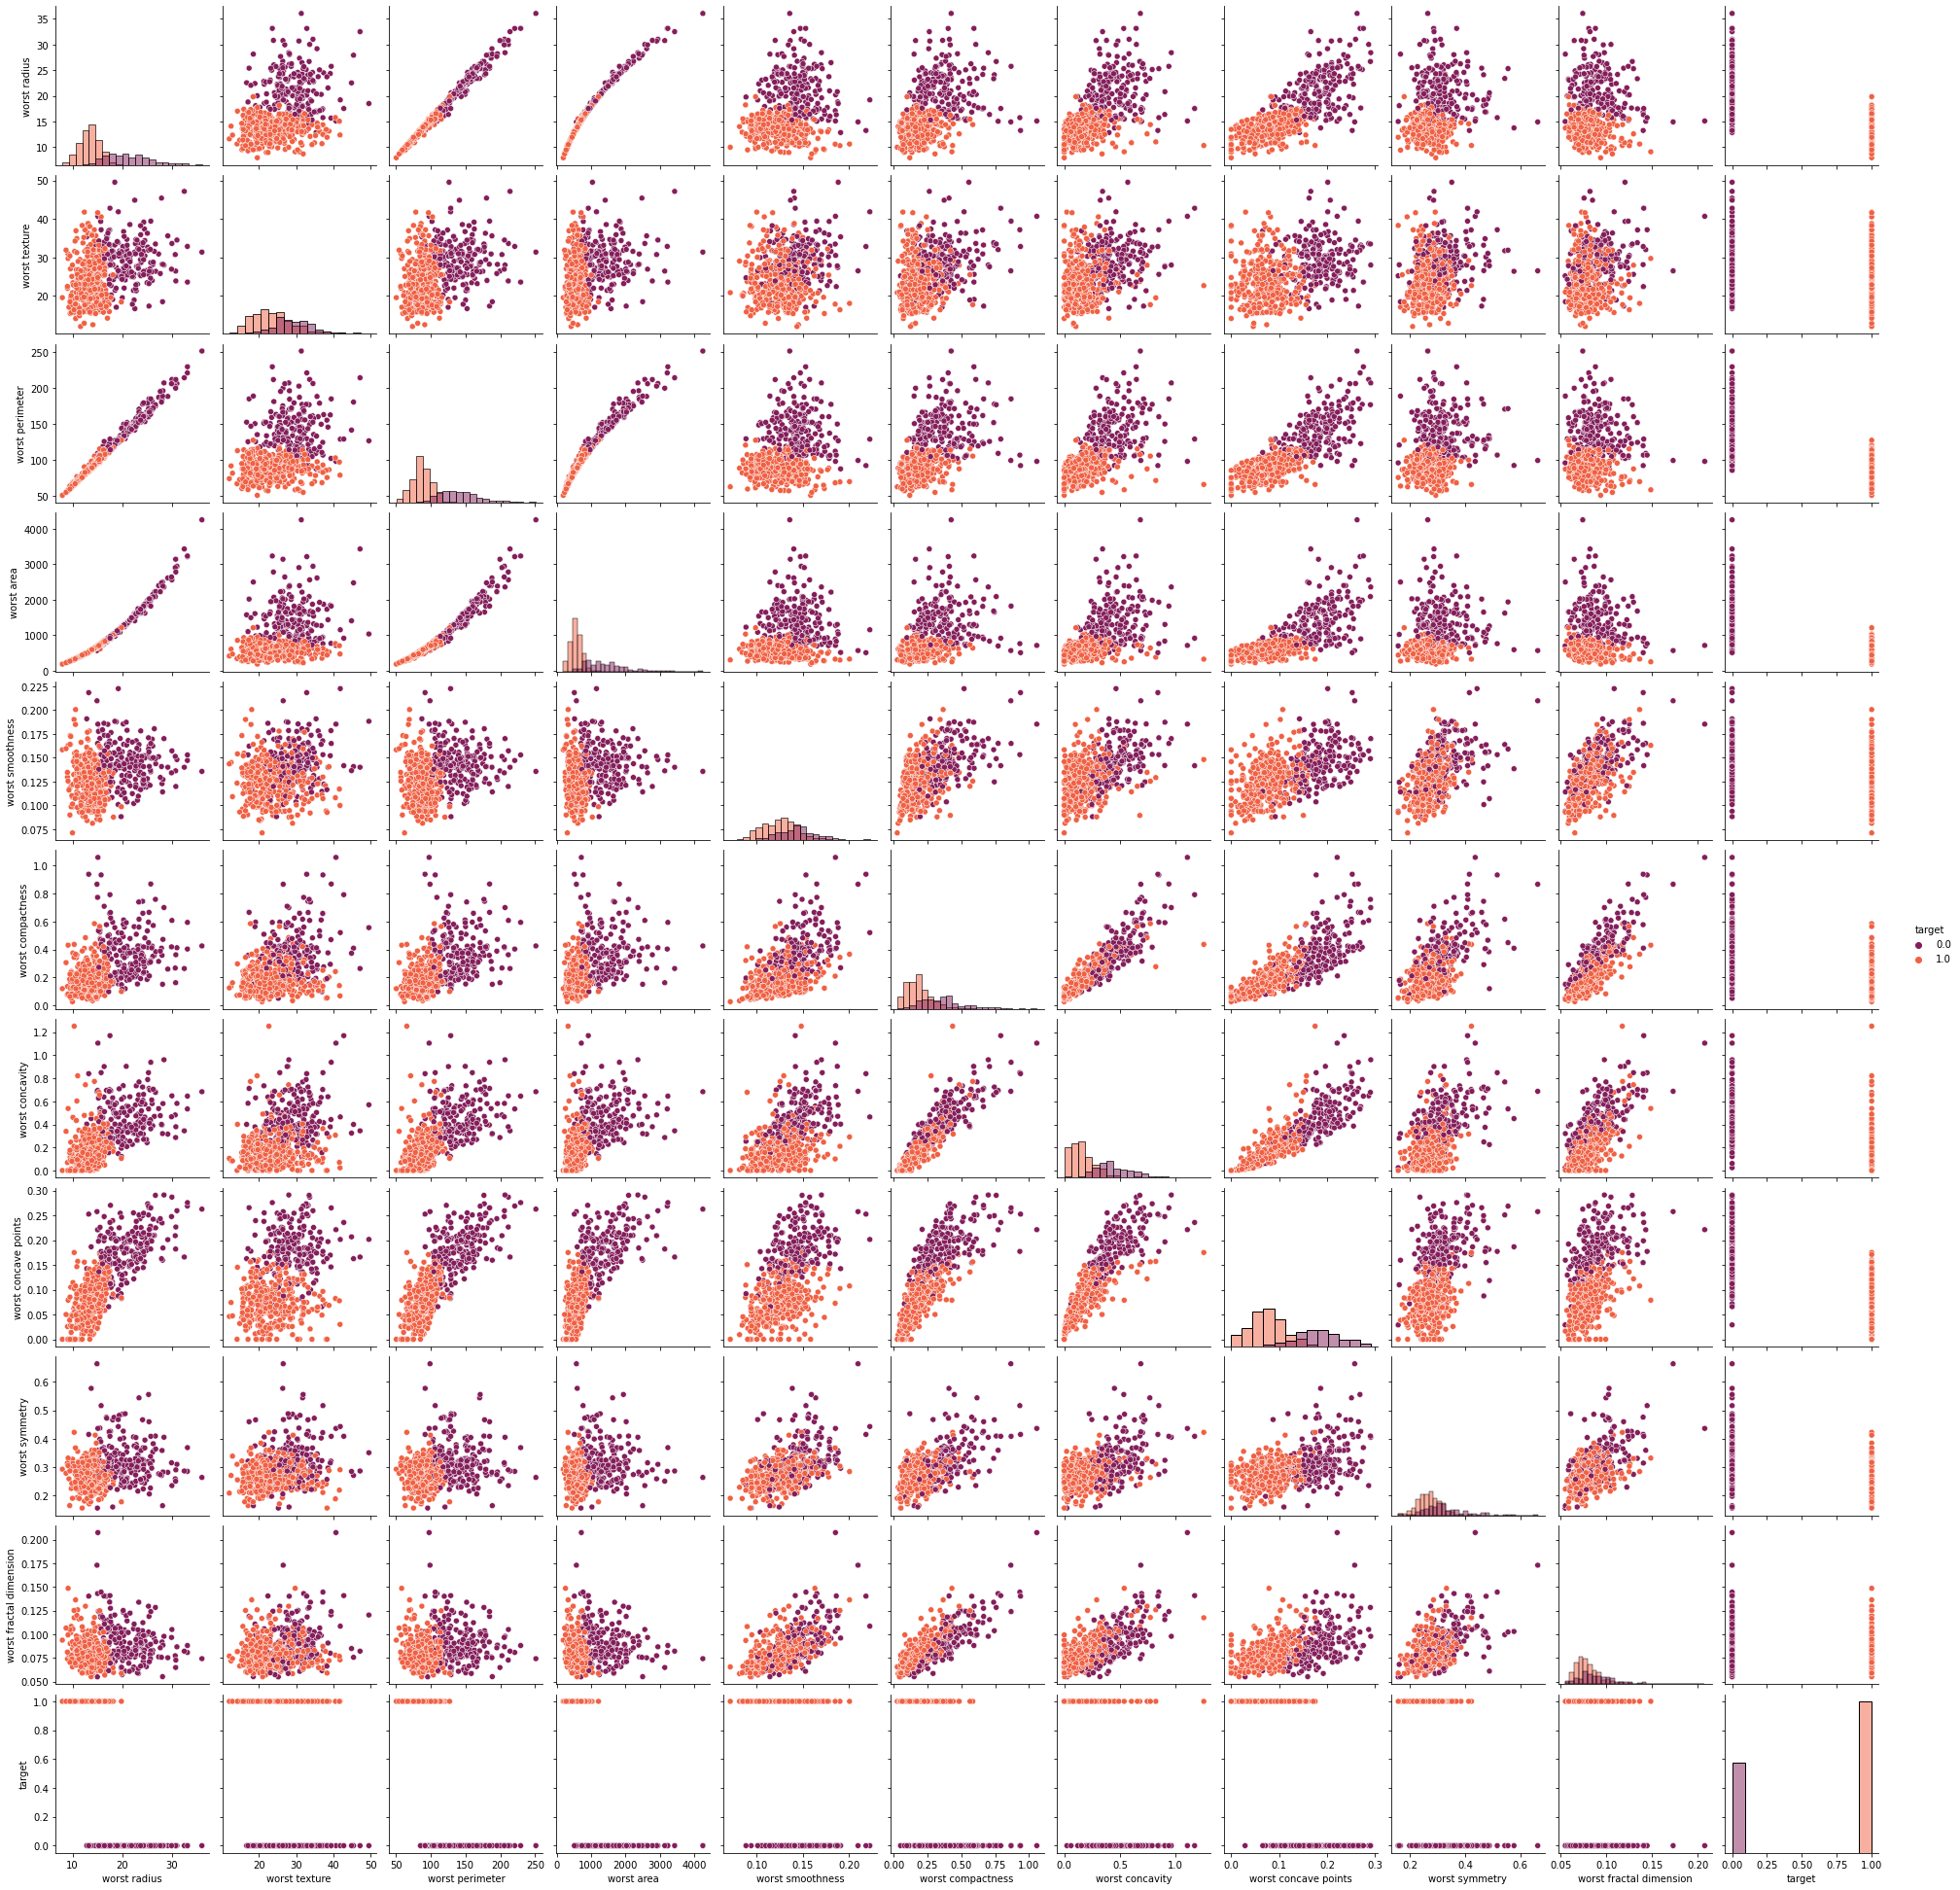

In [13]:
sns.pairplot(data = df, vars = worst_size, hue='target',palette='rocket', diag_kind='hist')

## Check Imbalanced Dataset

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

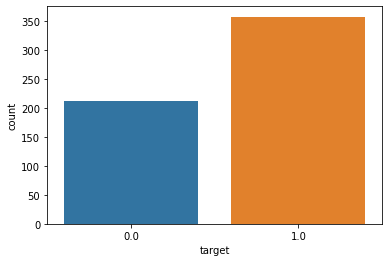

In [14]:
sns.countplot(df.target)

In [15]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

`The dataset is fairly balanced. Therefore, I can use 'accuracy' for the scoring of model`

# 4. Dataset Splitting

In [16]:
X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

# 5. Modeling

In [17]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [18]:
from jcopml.tuning.space import Integer, Real

In [19]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])

parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter= 50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s


{'algo__colsample_bytree': 0.10496990541124217, 'algo__learning_rate': 0.42748694552952193, 'algo__max_depth': 1, 'algo__min_child_samples': 17, 'algo__min_child_weight': 0.005358055009231867, 'algo__n_estimators': 182, 'algo__num_leaves': 182, 'algo__reg_alpha': 0.1406336677771817, 'algo__reg_lambda': 0.0271558195528294, 'algo__subsample': 0.35793452976256485}
1.0 0.9714767050075519 0.956140350877193


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   10.1s finished


____

# 6. Try to use the PCA method for reduction of dimension

In [20]:
from sklearn.decomposition import PCA

### 6.1. Use randomly n_components with PCA.

In [22]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca',  PCA()),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])

parameter = {
            'pca__n_components': Integer(1,30),
            'pca__whiten': [True, False],
            'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')
}

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter= 50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.7s finished


{'algo__colsample_bytree': 0.6051190832629311, 'algo__learning_rate': 0.05832486597608727, 'algo__max_depth': 3, 'algo__min_child_samples': 10, 'algo__min_child_weight': 0.00526901604613597, 'algo__n_estimators': 291, 'algo__num_leaves': 162, 'algo__reg_alpha': 0.12046674587990318, 'algo__reg_lambda': 0.6960678239135192, 'algo__subsample': 0.35544541040591565, 'pca__n_components': 28, 'pca__whiten': True}
1.0 0.9670326478447775 0.956140350877193


```json
The model choosing n_components = 28 automatically and get 95% for test score model.
```

### 6.2 Try to determine the number of n_components by using Cumulative Explained Variance in PCA

In [32]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

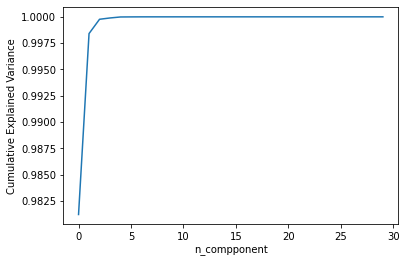

In [33]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_compponent')
plt.ylabel('Cumulative Explained Variance')

```json
Based on the Cumulative Explained Variance diagram, using only five components can save the information of the dataset over 95% that explain the dataset have a redundant number of feature.
```

In [24]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca',  PCA(n_components=5, whiten=True)),
    ('algo', LGBMClassifier(n_jobs=-1, random_state=42))
])

parameter = {
             'algo__num_leaves': Integer(low=60, high=300),
             'algo__max_depth': Integer(low=1, high=10),
             'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
             'algo__n_estimators': Integer(low=150, high=300),
             'algo__min_child_samples': Integer(low=10, high=40),
             'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
             'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
             'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
             'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
             'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter= 50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    2.3s remaining:    0.2s


{'algo__colsample_bytree': 0.14325303177733037, 'algo__learning_rate': 0.6260123864533059, 'algo__max_depth': 4, 'algo__min_child_samples': 11, 'algo__min_child_weight': 0.0018234490096303434, 'algo__n_estimators': 287, 'algo__num_leaves': 206, 'algo__reg_alpha': 1.0145478086525614, 'algo__reg_lambda': 2.666609148594754, 'algo__subsample': 0.6293468158094726}
0.9868131868131869 0.9560677355640758 0.9385964912280702


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.6s finished


```json
When I decide to use five components, I get a 93.8% for the test scores model. Of course the score is lower than others, but using PCA can help to machine get a result faster with retains some meaningful properties of the original data.
```

# 7. Evaluation
```json
This evaluation was created based on when I determined the number of n_components=5.
```

In [25]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

## 7.1. Classification Report

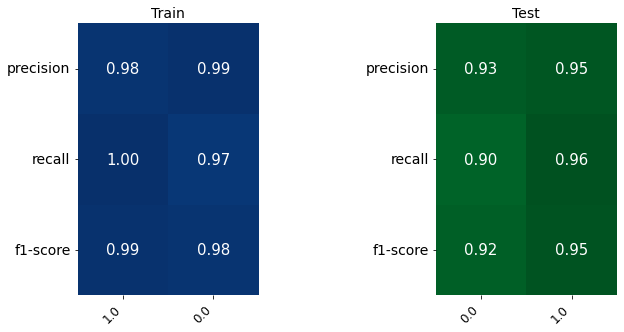

In [26]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [27]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       170
         1.0       0.98      1.00      0.99       285

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455


Test report
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        42
         1.0       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## 7.2. Confusion Matrix

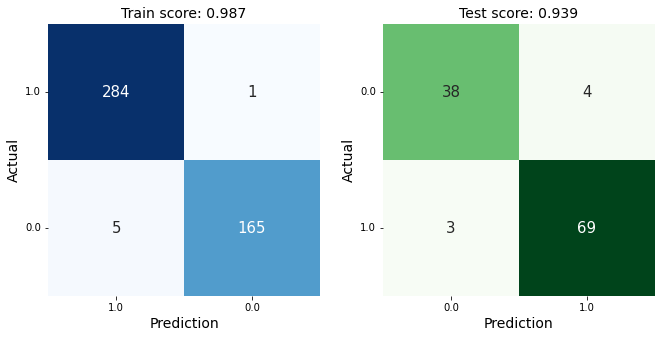

In [28]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## 7.3. ROC AUC Curve

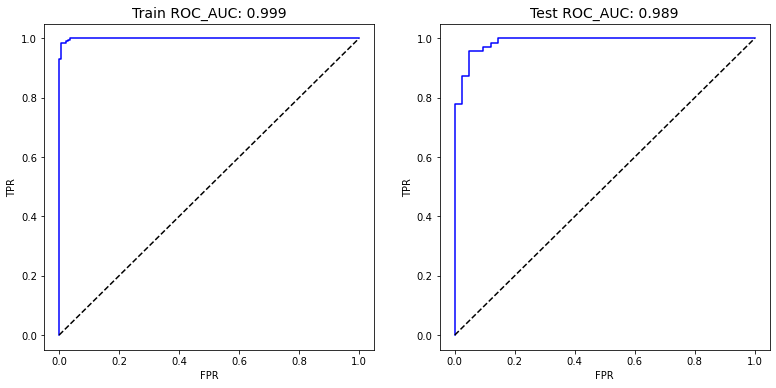

In [29]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

## 8.4. Precision-Recall Curve

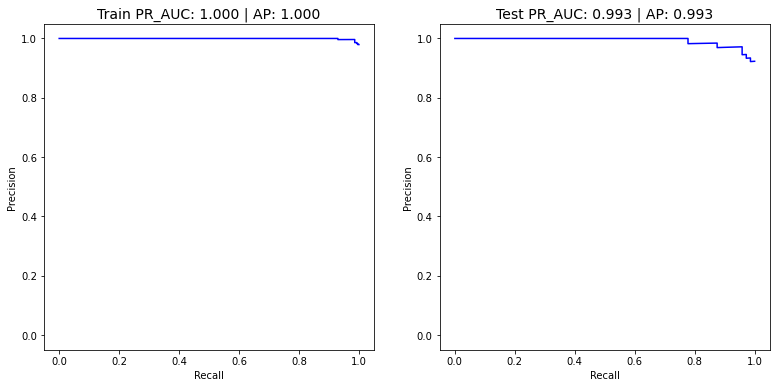

In [30]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Save Model

In [31]:
save_model(model.best_estimator_, 'Breast_Cancer_Prediction_by_LGBM_with_PCA.pkl')

Model is pickled as model/Breast_Cancer_Prediction_by_LGBM_with_PCA.pkl
